***Import Libraries***

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
def plot_confusion_matrix(y,y_hat,labels=None):
    "Generate a confusion matrix and plot it using seaborn."
    from sklearn.metrics import confusion_matrix
    # Generate confusion matrix
    cm = confusion_matrix(y, y_hat, labels=labels)
    # Plot using seaborn
    ax= plt.subplot()
    sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['Healthy', 'PD']); ax.yaxis.set_ticklabels(['healthy', 'PD'])

In [3]:
df=pd.read_csv("Parkinsson disease.csv")
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [4]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
df.rename (columns = ({
'MDVP:Fo(Hz)':'Av_vocal_freq',
'MDVP:Fhi(Hz)': 'Max_vocal_freq' ,
'MDVP:Flo(Hz)':'Min_vocal_freq',
'MDVP:Jitter(%)':'Jitter_%_freq','MDVP:Jitter(Abs)':'Jitter_Abs_freq','MDVP:RAP':'RAP_freq','MDVP:PPQ':'PPQ_freq','Jitter:DDP' :'DDP_freq',
'MDVP:Shimmer':'Shimmer_Amp','MDVP:Shimmer(dB)':'Shimmer_dB','Shimmer:APQ3':'APQ3_Amp','Shimmer:APQ5':'APQ5_Amp','MDVP:APQ':'APQ_Amp','Shimmer:DDA':'DDA_Amp',
'DFA':'Signal_scale'}),inplace=True)

In [8]:
df.drop('name' , axis = 1 ,inplace = True)

In [9]:
print(df.columns)

Index(['Av_vocal_freq', 'Max_vocal_freq', 'Min_vocal_freq', 'Jitter_%_freq',
       'Jitter_Abs_freq', 'RAP_freq', 'PPQ_freq', 'DDP_freq', 'Shimmer_Amp',
       'Shimmer_dB', 'APQ3_Amp', 'APQ5_Amp', 'APQ_Amp', 'DDA_Amp', 'NHR',
       'HNR', 'status', 'RPDE', 'Signal_scale', 'spread1', 'spread2', 'D2',
       'PPE'],
      dtype='object')


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Av_vocal_freq      0
Max_vocal_freq     0
Min_vocal_freq     0
Jitter_%_freq      0
Jitter_Abs_freq    0
RAP_freq           0
PPQ_freq           0
DDP_freq           0
Shimmer_Amp        0
Shimmer_dB         0
APQ3_Amp           0
APQ5_Amp           0
APQ_Amp            0
DDA_Amp            0
NHR                0
HNR                0
status             0
RPDE               0
Signal_scale       0
spread1            0
spread2            0
D2                 0
PPE                0
dtype: int64

In [12]:
X = df.drop("status", axis=1)
y = df["status"]

In [13]:
print(X.columns)

Index(['Av_vocal_freq', 'Max_vocal_freq', 'Min_vocal_freq', 'Jitter_%_freq',
       'Jitter_Abs_freq', 'RAP_freq', 'PPQ_freq', 'DDP_freq', 'Shimmer_Amp',
       'Shimmer_dB', 'APQ3_Amp', 'APQ5_Amp', 'APQ_Amp', 'DDA_Amp', 'NHR',
       'HNR', 'RPDE', 'Signal_scale', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [14]:
transform = preprocessing.StandardScaler()
X_scaled = transform.fit_transform(X)
X_scaled

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [16]:
lr = LogisticRegression()
parameters = { 'C':[0.001 , 0.01 , 0.1, 1 , 10 , 100],
             'penalty': ['l1' , 'l2'],
             'solver' : ['lbfgs' , 'liblinear' , 'newton-cg']
             }
logreg_cv = GridSearchCV(lr , parameters)
logreg_cv.fit(X_train , y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']})

In [17]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8463709677419355


In [18]:
accu=[]
methods=[]
accu.append(logreg_cv.score(X_test,y_test))
methods.append('logistic regression')
logreg_cv.score(X_test,y_test)

0.8717948717948718

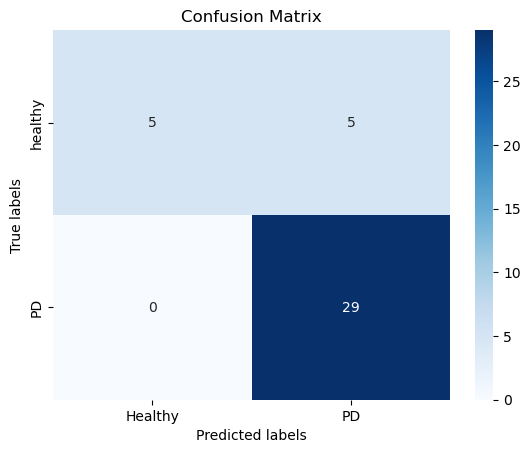

In [19]:
y_hat = logreg_cv.predict(X_test)
plot_confusion_matrix(y_test , y_hat)

In [20]:
parameters = {'kernel': ('linear', 'rbf', 'poly','sigmoid'),
             'C':(0.5 , 1,1.5)}
svm = SVC()

In [21]:
svm_cv = GridSearchCV(svm, parameters , cv = 10)
svm_cv.fit(X_train , y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': (0.5, 1, 1.5),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [22]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.5, 'kernel': 'rbf'}
accuracy : 0.8841666666666667


In [23]:
accu.append(svm_cv.score(X_test,y_test))
methods.append('support vector machine')
svm_cv.score(X_test,y_test)

0.9487179487179487

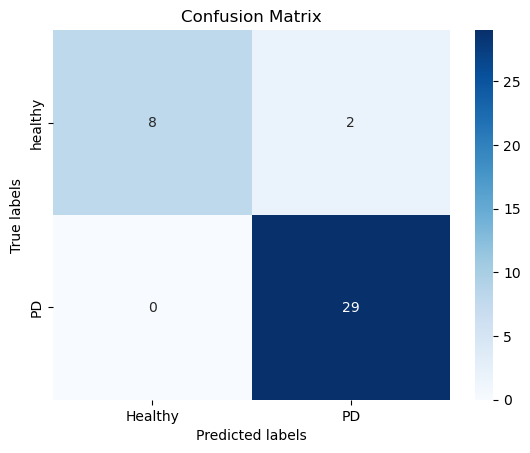

In [24]:
y_hat=svm_cv.predict(X_test)
plot_confusion_matrix(y_test,y_hat)

In [25]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier()

In [26]:
tree_cv = GridSearchCV(tree,parameters, cv = 10)
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [27]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.9041666666666668


In [28]:
accu.append(tree_cv.score(X_test,y_test))
methods.append('decision tree classifier')
tree_cv.score(X_test,y_test)

0.8205128205128205

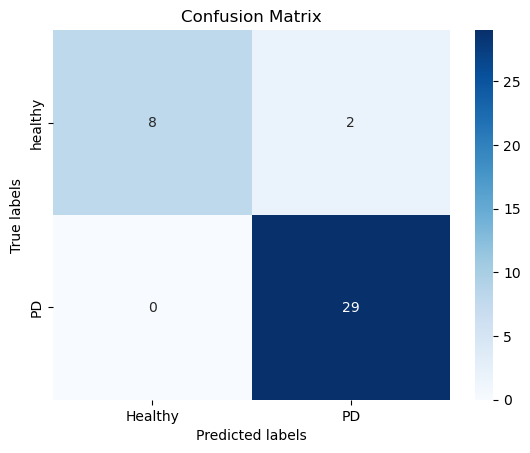

In [29]:
y_hat = svm_cv.predict(X_test)
plot_confusion_matrix(y_test,y_hat)

In [30]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [31]:
knn_cv = GridSearchCV(KNN, parameters, cv = 10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [32]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}
accuracy : 0.9412500000000001


In [33]:
accu.append(knn_cv.score(X_test,y_test))
methods.append('k nearest neighbors')
knn_cv.score(X_test,y_test)

0.9743589743589743

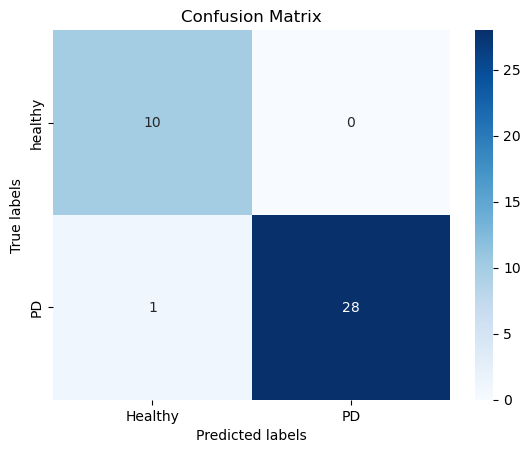

In [34]:
y_hat = knn_cv.predict(X_test)
plot_confusion_matrix(y_test,y_hat)

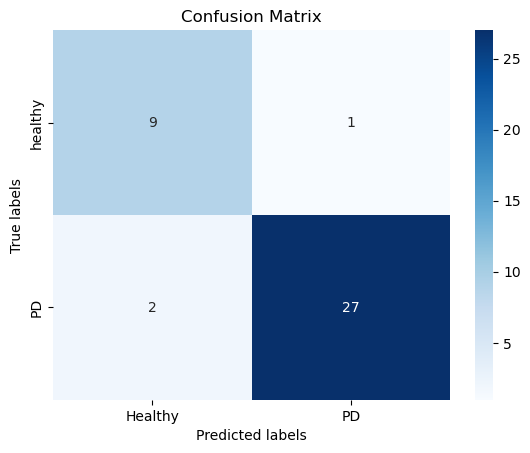

In [35]:
rfc = RandomForestClassifier(n_estimators=100, random_state=110)

# Train the classifier on the training data
rfc.fit(X_train, y_train)

# Predict the labels of the test data
y_hat = rfc.predict(X_test)
plot_confusion_matrix(y_test,y_hat)

In [36]:
accu.append(rfc.score(X_test,y_test))
methods.append('Random Forest Classifier')
rfc.score(X_test,y_test)

0.9230769230769231

In [37]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_hat = gnb.predict(X_test)

In [38]:
accu.append(gnb.score(X_test,y_test))
methods.append('Naive Bayes')
gnb.score(X_test,y_test)

0.6153846153846154

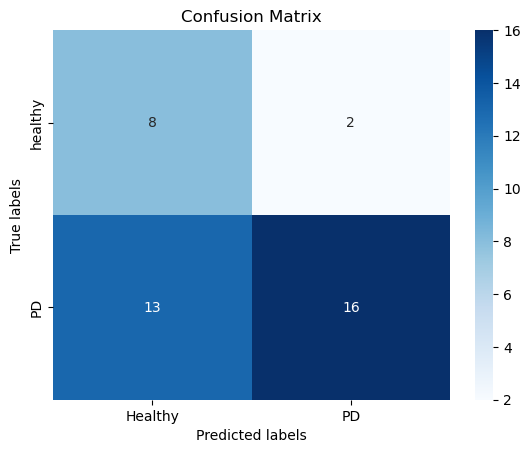

In [39]:
plot_confusion_matrix(y_test,y_hat)

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [41]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_hat = ada.predict(X_test)

In [42]:
accu.append(ada.score(X_test,y_test))
methods.append('Adaboost Classifier')
ada.score(X_test,y_test)

0.9230769230769231

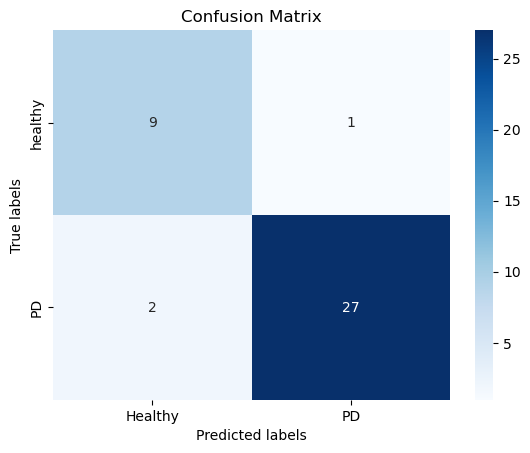

In [43]:
plot_confusion_matrix(y_test,y_hat)

In [44]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_hat = lda.predict(X_test)

In [45]:
accu.append(lda.score(X_test,y_test))
methods.append('Linear Discriminant Analysis')
lda.score(X_test,y_test)

0.9230769230769231

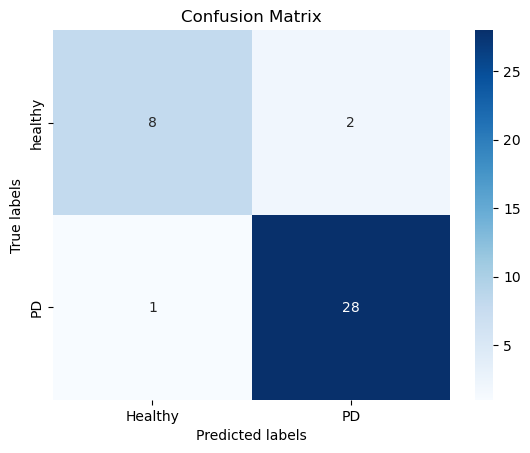

In [46]:
plot_confusion_matrix(y_test,y_hat)

In [47]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_hat = xgb.predict(X_test)

In [48]:
accu.append(xgb.score(X_test,y_test))
methods.append('XGBClassifier')
xgb.score(X_test,y_test)

0.9487179487179487

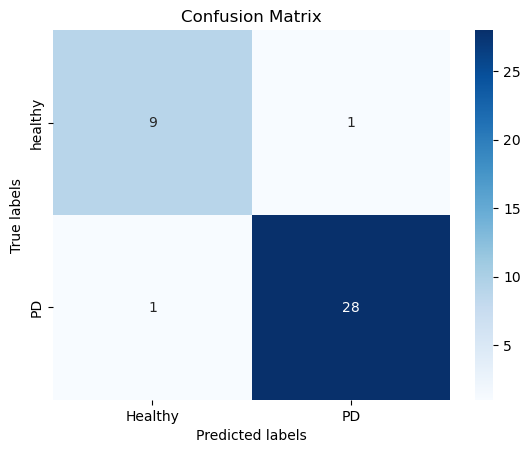

In [49]:
plot_confusion_matrix(y_test,y_hat)

In [50]:
print(methods)
print(accu)

['logistic regression', 'support vector machine', 'decision tree classifier', 'k nearest neighbors', 'Random Forest Classifier', 'Naive Bayes', 'Adaboost Classifier', 'Linear Discriminant Analysis', 'XGBClassifier']
[0.8717948717948718, 0.9487179487179487, 0.8205128205128205, 0.9743589743589743, 0.9230769230769231, 0.6153846153846154, 0.9230769230769231, 0.9230769230769231, 0.9487179487179487]


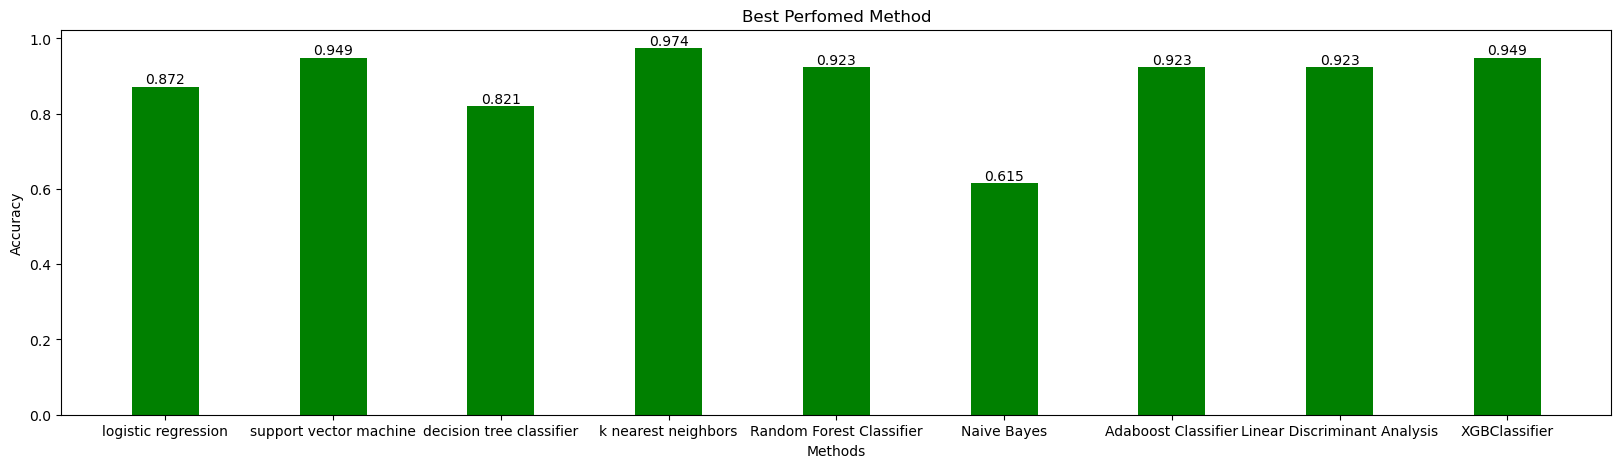

In [51]:

fig = plt.figure(figsize = (20, 5))

# creating the bar plot
bars = plt.bar(methods, accu, color ='green',width = 0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height,'{:.3f}'.format(height), ha='center', va='bottom')

plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Best Perfomed Method")
plt.show()